# mpl_widget_box Tutorial

We will start with a simple matplotlib plot and add buttons to change it. Below, we defines a button to draw a random line.

In [1]:
%matplotlib notebook


In [2]:
# import matplotlib and mpl_widget_box
import matplotlib.pyplot as plt
from mpl_widget_box import (widgets as W,
                            install_widgets_simple)


<IPython.core.display.Javascript object>


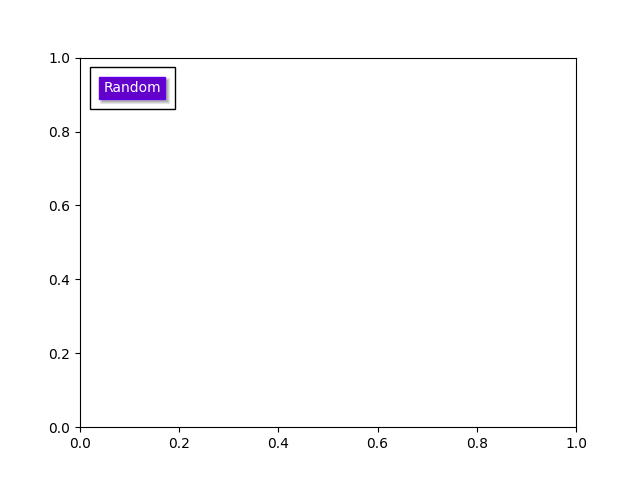

In [3]:
fig, ax = plt.subplots()

# Widgets to be added.
widgets = [
    W.Button("btn1", "Random")  # The first argument is a widget id, and the
                                # second is the button label.
]

# widgets need to be installed. The most simple way is to use the
# `install_widgets_simple` function.
wbm = install_widgets_simple(ax, widgets)

plt.show()


You will see a button at the upper left corner of your plot. And if you you hover your mouse over that button, you will see color of the button gets brightened.
But, nothing will happen if you click the button.

To give it a behavior, you need to define a callback funstion. Here is an example. Note that the `install_widgets_simple` functions returns an instance of `WidgetBoxManager` which manages the widgets and their user interactions. So, you first define a function and give it to the manager.

The callback function should take three arguments; an instance of `WidgetBoxManager` wbm, an instance of `WdigetBoxEvent` ev, and a dictionary status. `WidgetBoxEvent` is not Matplotlib's event. It has an attribute of `wid`, which tells from which the event is triggered.


In [4]:
from numpy.random import rand

def cb(wbm, ev, status):
    ax.plot(rand(10))
    wbm.draw_idle() # If you change the status of the plot, you need to
                    # call this so that plot is updated.

wbm.set_callback(cb)


The callback function can be set when you call `install_widgets_simple` as a 3rd argument.

Lets try another example, but with two buttons; one to draw, another to clear.


<IPython.core.display.Javascript object>


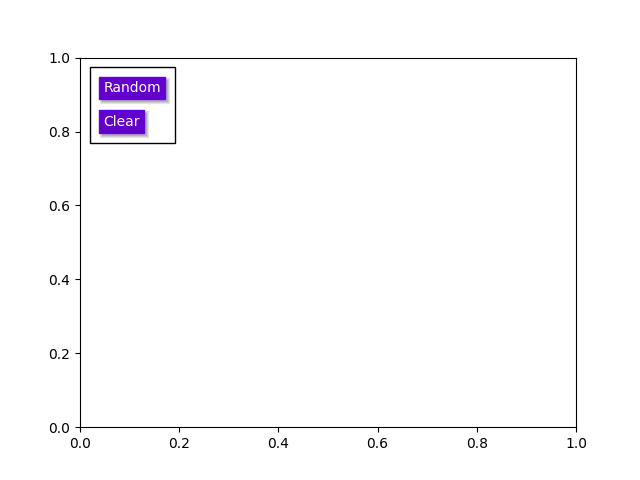

In [5]:
fig, ax = plt.subplots()

# Widgets to be added.
widgets = [
    W.Button("btn1", "Random"),
    W.Button("btn2", "Clear"),
]

def cb(wbm, ev, status):
    # This function will be called whenever an event is triggered (e.g., button
    # press). To know which button is pressed, we check the widget id
    # (wid) attriute of the `ev` object.

    if ev.wid == "btn1":  # btn1 is pressed.
        ax.plot(rand(10))
        wbm.draw_idle()

    elif ev.wid == "btn2":  # btn2 is pressed
        ax.cla()
        wbm.draw_idle()

install_widgets_simple(ax, widgets, cb)

plt.show()


`mpl_widget_box` supports several widget types. Let's try Radio buttons.


<IPython.core.display.Javascript object>


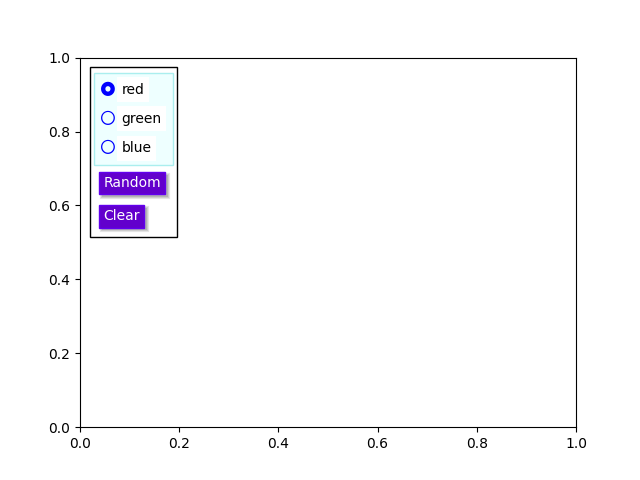

{'radio1': {'selected': 0, 'value': 'red'}, 'btn1': {}, 'btn2': {}}


In [6]:
fig, ax = plt.subplots()

# Widgets to be added.
widgets = [
    W.Radio("radio1", ["red", "green", "blue"]),
    W.Button("btn1", "Random"),
    W.Button("btn2", "Clear")
]

def cb(wbm, ev, status):
    # let's check the contents of status
    print(status)

wbm3 = install_widgets_simple(ax, widgets, cb)

plt.show()


Try to select red, green or blue. You will notice that the contents of the `status` variable will reflect the crrent selection. You can get the currently selected colory by calling`status['radio']['value']`. Let's modify the callback function so that it draw lines with selected colors.


In [7]:
def cb(wbm, ev, status):

    if ev.wid == "btn1":  # btn1 is pressed.
        color = status['radio1']['value']
        ax.plot(rand(10), color=color)
        wbm.draw_idle()

    elif ev.wid == "btn2":  # btn2 is pressed
        ax.cla()
        wbm.draw_idle()

wbm3.set_callback(cb)


Note that while radio buttons will trigger callbacks, the callback function does not have to do anything; even a `draw_idle` is not necessary (changing the status of widget does not require explicit `draw_idle`. We need to call `draw_idle` only when the plot is changed (not the widgets).
